## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, regular, lumda, out_unit = 10, hidden_unit = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, neurons in enumerate(hidden_unit):
        if i == 0:
            x = keras.layers.Dense(units = neurons, activation = 'relu', name = 'hidden_'+str(i+1),
                                   kernel_regularizer = regular(lumda))(input_layer)
        else:
            x = keras.layers.Dense(units = neurons, activation = 'relu', name = 'hidden_'+str(i+1),
                                   kernel_regularizer = regular(lumda))(x)
    
    output_layer = keras.layers.Dense(units = out_unit, activation = 'softmax', name = 'output_layer')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    
    return model

In [15]:
"""Code Here
設定超參數
"""
LR = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95
regular = [l1, l2]
lumda = [1e-2, 1e-3, 1e-4, 1e-5]

In [18]:
import itertools
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regula, parm in itertools.product(regular, lumda):
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], regula, parm)
    model.summary()
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    
    exp_tag = 'exp_%s_%s' % (str(regula), str(parm))
    results[exp_tag] = {
        'train-loss': train_loss,
        'val-loss': val_loss,
        'train-acc': train_acc,
        'val-acc': val_acc
    }

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
hidden_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 500

Epoch 48/50
50000/50000 [==============================] - 18s 363us/step - loss: 4.4290 - acc: 0.0969 - val_loss: 4.4262 - val_acc: 0.1000- acc: 0.
Epoch 49/50
50000/50000 [==============================] - 18s 364us/step - loss: 4.4290 - acc: 0.0976 - val_loss: 4.4275 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 18s 365us/step - loss: 4.4290 - acc: 0.0967 - val_loss: 4.4278 - val_acc: 0.1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
hidden_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
hidden_3 (Dense)             (None, 128)   

Epoch 49/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.0841 - acc: 0.3480 - val_loss: 2.1025 - val_acc: 0.3313
Epoch 50/50
50000/50000 [==============================] - 18s 364us/step - loss: 2.0895 - acc: 0.3454 - val_loss: 2.0906 - val_acc: 0.3529
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
hidden_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290 

Epoch 50/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.5048 - acc: 0.5321 - val_loss: 1.6008 - val_acc: 0.5019
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
hidden_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 379us/step - loss: 3.5758 - acc: 0.2941 - val_loss: 2.1724 - val_acc: 0.3321
Epoch 2/50
50000/50000 [==============================] - 18s 364us/step - loss: 2.0983 - acc: 0.3366 - val_loss: 2.0425 - val_acc: 0.3386
Epoch 3/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.9852 - acc: 0.3462 - val_loss: 1.9741 - val_acc: 0.3438
Epoch 4/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.9479 - acc: 0.3514 - val_loss: 1.9320 - val_acc: 0.3518
Epoch 5/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.9216 - acc: 0.3554 - val_loss: 1.8908 - val_acc: 0.3786
Epoch 6/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.8916 - acc: 0.3645 - val_loss: 1.8457 - val_acc: 0.3906
Epoch 7/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.8822 - acc: 0.3665 - val_loss: 1.

50000/50000 [==============================] - 19s 376us/step - loss: 2.3855 - acc: 0.3148 - val_loss: 1.9972 - val_acc: 0.3678
Epoch 2/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.9074 - acc: 0.3840 - val_loss: 1.8286 - val_acc: 0.4086
Epoch 3/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.7928 - acc: 0.4099 - val_loss: 1.7430 - val_acc: 0.4205
Epoch 4/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.7324 - acc: 0.4270 - val_loss: 1.7193 - val_acc: 0.4265
Epoch 5/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.6803 - acc: 0.4450 - val_loss: 1.7231 - val_acc: 0.4264
Epoch 6/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.6516 - acc: 0.4521 - val_loss: 1.6377 - val_acc: 0.4592
Epoch 7/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.6389 - acc: 0.4568 - val_loss: 1.6130 - val_acc: 0.4679
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 18s 370us/step - loss: 1.7397 - acc: 0.3966 - val_loss: 1.6490 - val_acc: 0.4351
Epoch 3/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.6419 - acc: 0.4316 - val_loss: 1.6177 - val_acc: 0.4309
Epoch 4/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.5833 - acc: 0.4529 - val_loss: 1.5535 - val_acc: 0.4600
Epoch 5/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.5341 - acc: 0.4690 - val_loss: 1.5279 - val_acc: 0.4744
Epoch 6/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.5048 - acc: 0.4800 - val_loss: 1.5168 - val_acc: 0.4743
Epoch 7/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.4773 - acc: 0.4885 - val_loss: 1.4958 - val_acc: 0.4901
Epoch 8/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.4509 - acc: 0.5010 - val_loss: 1.5218 - val_acc: 0.4791
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 18s 361us/step - loss: 1.5953 - acc: 0.4317 - val_loss: 1.5653 - val_acc: 0.4447
Epoch 4/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.5386 - acc: 0.4539 - val_loss: 1.5507 - val_acc: 0.4503
Epoch 5/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.5006 - acc: 0.4688 - val_loss: 1.4945 - val_acc: 0.4810
Epoch 6/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.4592 - acc: 0.4821 - val_loss: 1.4877 - val_acc: 0.4709
Epoch 7/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.4233 - acc: 0.4965 - val_loss: 1.4726 - val_acc: 0.4794
Epoch 8/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.4004 - acc: 0.5053 - val_loss: 1.5204 - val_acc: 0.4618
Epoch 9/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.3709 - acc: 0.5157 - val_loss: 1.4524 - val_acc: 0.4865
Epoch 10/50
50000/50000 [=============

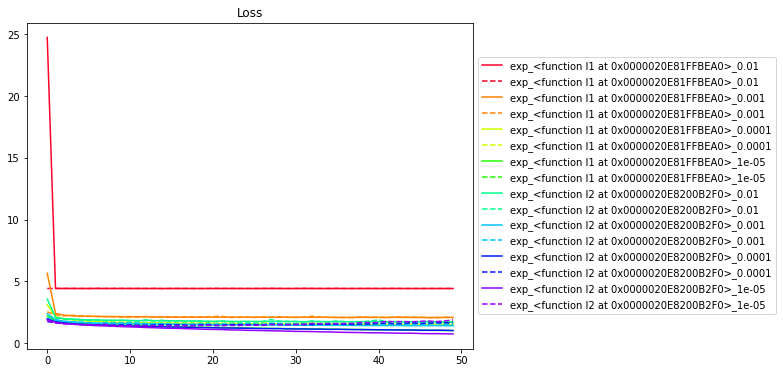

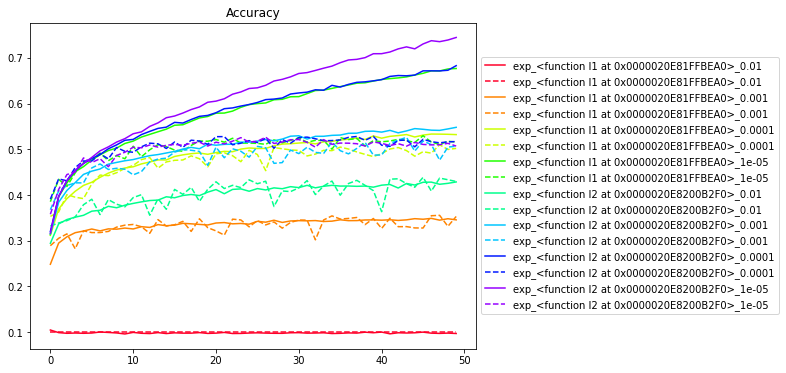

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_num = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/color_num) for i in range(color_num)]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val-acc'])), results[cond]['val-acc'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
